## Ejercicio 1.

##### Carga y Exploración de Datos

**Objetivo:** Familiarizarse con el conjunto de datos y comprender la distribución de las categorías.

**Acciones:**
* Cargar el archivo Noticias.xlsx que contiene las noticias.
* Explorar la distribución de la columna Etiqueta para ver cuántas noticias pertenecen a cada categoría.
* Visualizar esta distribución mediante gráficos para identificar las categorías más frecuentes.

# Librerias

In [136]:
import re ## Exprexiones regulares
import nltk ## Procesamiento de lenguaje natural
from nltk.corpus import stopwords ## Palabras vacias
from nltk.stem import SnowballStemmer ## Stemming
from nltk.tokenize import word_tokenize ## Tokenizacion
from nltk.tokenize import RegexpTokenizer ## Tokenizacion
from sklearn.feature_extraction.text import CountVectorizer ## Vectorizador
import spacy ## Procesamiento de lenguaje natural
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import string
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM
import tensorflow as tf
import random
from sklearn.metrics import classification_report

############## Descarga de recursos de nltk ################
nltk.download('punkt') ## Tokenizador
nltk.download('stopwords') ## Palabras vacias
nltk.download('snowball_data') ## Stemming
nltk.download('wordnet') ## Lematizacion

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ermenegildo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ermenegildo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package snowball_data to
[nltk_data]     C:\Users\Ermenegildo\AppData\Roaming\nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ermenegildo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Cargar los datos

In [137]:
df_Noticias = pd.read_excel(r'.\Datos\Datos_Crudos\Noticias.xlsx')
df_Noticias

,Columna1,Enlaces,Título,info,contenido,Etiqueta
0,0,https://www.eltiempo.com/agresion-contra-un-op...,Operador de grúa quedó inconsciente tras agres...,El conductor de una moto le lanzó el casco y p...,Las autoridades están buscando al conductor de...,colombia
1,1,https://www.eltiempo.com/archivo/documento/CMS...,"Usaquén, primera en infracciones por mal parqueo",La localidad ocupa el primer lugar en comparen...,"""Los andenes son para los peatones"", reclama e...",archivo
2,2,https://www.eltiempo.com/archivo/documento/CMS...,'Me atracaron y vi un arma que me heló la sang...,Un ciudadano relata cómo cuatro hombres lo rob...,A las 7 de la noche me había quedado de encont...,archivo
3,3,https://www.eltiempo.com/archivo/documento/CMS...,"Escoltas mal estacionados, dolor de cabeza de ...",Las zonas de restaurantes se convierten en par...,Atravesados. Eso es lo que se les pasa por la ...,archivo
4,4,https://www.eltiempo.com/archivo/documento/CMS...,Radicado primer proyecto que autorizaría union...,"El representante de 'la U', Miguel Gómez, dijo...",“Estamos proponiendo la figura de un contrato ...,archivo
...,...,...,...,...,...,...
14391,14391,https://www.eltiempo.com/vida/viajar/una-viaje...,Una viajera pensó que la aerolínea Viva Air le...,La mujer hizo la denuncia en redes. La aerolín...,En Twitter es tendencia 'FCAS' por una denunci...,vida
14392,14392,https://www.eltiempo.com/vida/viajar/un-dia-pe...,"Un día perfecto en Coco Cay, la isla privada d...",El proyecto Global Private Island Collection c...,La naviera internacional Royal Caribbean prese...,vida
14393,14393,https://www.eltiempo.com/vida/viajar/visitar-b...,Barú: el paraíso colombiano abierto para todos...,Cuatro hoteles y el Aviario Nacional lanzarán ...,¿Necesita razones para ir a Barú? A menos de u...,vida
14394,14394,https://www.eltiempo.com/vida/viajar/we-trade-...,"Con WeTrade, llega la hora LGBT a Bogotá",El 1 y 2 de noviembre se celebrará esta Feria ...,Se estima que la población LGTBI en Colombia e...,vida


# Exploracion de la columna Etiqueta

In [138]:
df_Noticias['Etiqueta'].value_counts()

Etiqueta
archivo                 9187
colombia                 934
deportes                 727
opinion                  532
mundo                    446
cultura                  430
economia                 367
justicia                 343
bogota                   311
vida                     268
politica                 252
tecnosfera               214
salud                    106
historias-el-tiempo       57
mundial                   47
contenido-comercial       34
elecciones                33
unidad-investigativa      27
podcast                   20
foro-w                    18
bocas                     15
carrusel                   8
datos                      7
lecturas-dominicales       6
mas-contenido              4
especiales                 3
Name: count, dtype: int64

# Grafico de distribucion

C:\Users\Ermenegildo\AppData\Local\Temp\ipykernel_8120\970067192.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


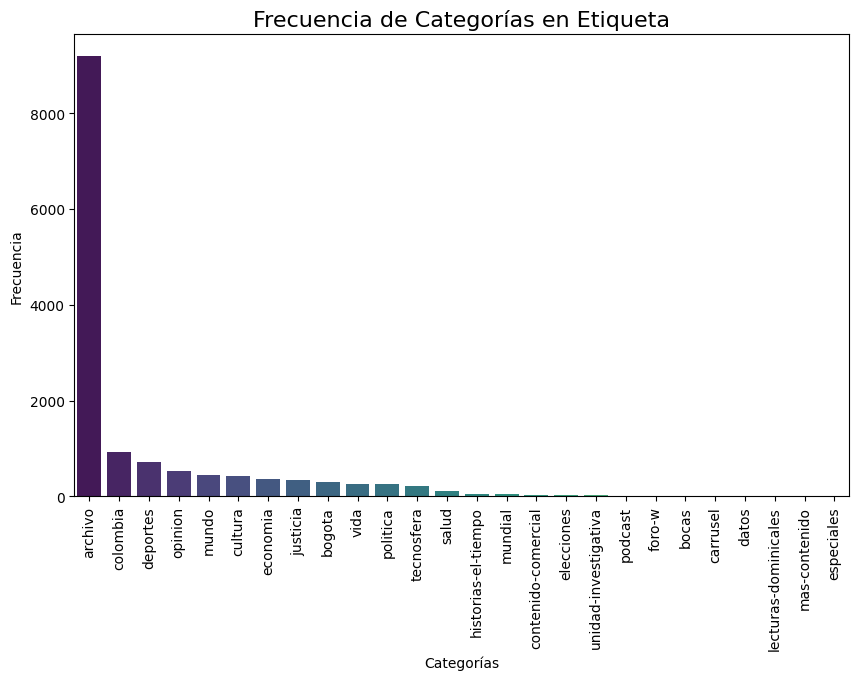

In [139]:
# Contar las frecuencias de cada categoría en 'Etiqueta'
categoria_frecuencias = df_Noticias['Etiqueta'].value_counts()

# Crear un gráfico de barras para visualizar las frecuencias
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.barplot(
    x=categoria_frecuencias.index,  # Categorías en el eje X
    y=categoria_frecuencias.values,  # Frecuencias en el eje Y
    palette="viridis"  # Paleta de colores
)

# Personalización del gráfico
plt.title('Frecuencia de Categorías en Etiqueta', fontsize=16)
plt.xlabel('Categorías', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.xticks(rotation=90)  # Rotar etiquetas si hay muchas categorías
plt.show()


# Ejercicio 2

#### Filtrado de Datos

**Objetivo:** Limitar el conjunto de datos a las categorías relevantes para garantizar que el modelo se entrene y evalúe en temas especializados.

**Acciones:**
* Excluir las noticias que pertenecen a la categoría "archivo" y cualquier otra que no esté en las categorías de deportes, cultura, economía y justicia.
* Asegurarse de que el conjunto de datos resultante tenga una distribución equilibrada para estas categorías, en la medida de lo posible.

# Excluir categorias

In [140]:
# Lista de etiquetas a filtrar
etiquetas = ['deportes', 'cultura','economia','justicia']

# Filtrar filas donde la columna 'Etiqueta' contiene alguno de los valores en la lista
df_Noticias_Filtro = df_Noticias[df_Noticias['Etiqueta'].isin(etiquetas)].reset_index(drop=True)

In [141]:
df_Noticias_Filtro['Etiqueta'].value_counts()

Etiqueta
deportes    727
cultura     430
economia    367
justicia    343
Name: count, dtype: int64

# Distribucion Equilibrada

In [142]:
# Se eliminan los registros nulos
df_Noticias_Filtro = df_Noticias_Filtro.dropna(subset=['contenido']).reset_index(drop=True)

In [143]:
# Encuentra el tamaño de la categoría con menos ocurrencias
min_size = df_Noticias_Filtro['Etiqueta'].value_counts().min()

# Realiza el submuestreo para cada categoría
df_submuestreado = df_Noticias_Filtro.groupby('Etiqueta').sample(n=min_size, random_state=42).reset_index(drop=True)

In [144]:
df_submuestreado['Etiqueta'].value_counts()

Etiqueta
cultura     343
deportes    343
economia    343
justicia    343
Name: count, dtype: int64

# Ejercicio 3

#### Preprocesamiento de Texto

**Objetivo:** Preparar los datos textuales para el entrenamiento del modelo.

**Acciones:**
* Convertir todo el texto a minúsculas para uniformidad.
* Eliminar puntuación y números para reducir el ruido en los datos.
* Eliminar palabras comunes (stop words) que no aportan significado específico al análisis.
* Tokenizar el texto, es decir, dividir el texto en palabras individuales.
* Aplicar padding a las secuencias de palabras para que todas tengan la misma longitud, facilitando el procesamiento por las redes neuronales.

# Paso 1: Prepocesamiento de Texto

In [145]:
# Función para preprocesar texto
def preprocess_text(text):
    """
    Esta función realiza el preprocesamiento del texto.
    1. Convierte el texto a minúsculas.
    2. Elimina la puntuación.
    3. Elimina los números.
    4. Elimina los espacios en blanco adicionales.

    Parámetros:
    text (str): El texto original.

    Retorna:
    str: El texto preprocesado.
    """
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Eliminar espacios en blanco adicionales
    text = text.strip()
    # Eliminar todo lo que no sea alfanumérico o espacio
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Aplicar preprocesamiento al contenido
df_submuestreado['contenido_preprocesado'] = df_submuestreado['contenido'].apply(preprocess_text)

# Mostrar una vista previa de los datos preprocesados
display(df_submuestreado[['contenido', 'contenido_preprocesado']].head())

# Dimensiones de los datos
print(f'Dimensiones de los datos: {df_submuestreado.shape}')

,contenido,contenido_preprocesado
0,"Siendo un niño, ‘El Sol de México’ se convirti...",siendo un niño el sol de méxico se convirtió e...
1,Las películas de Víctor Gaviria constituyen un...,las películas de víctor gaviria constituyen un...
2,"Del inagotable repertorio de las salsas, no cr...",del inagotable repertorio de las salsas no cre...
3,"La Casa 1537, ubicada en la calle del Colegio ...",la casa ubicada en la calle del colegio del c...
4,"Judas Priest, la banda británica fundamental e...",judas priest la banda británica fundamental en...


Dimensiones de los datos: (1372, 7)


In [146]:
df_submuestreado.head(5)

,Columna1,Enlaces,Título,info,contenido,Etiqueta,contenido_preprocesado
0,10909,https://www.eltiempo.com/cultura/musica-y-libr...,"Luis Miguel, 50 años de un sol sin ocaso",'El Sol de México' cumple 50 años. Su historia...,"Siendo un niño, ‘El Sol de México’ se convirti...",cultura,siendo un niño el sol de méxico se convirtió e...
1,10562,https://www.eltiempo.com/cultura/cine-y-tv/cri...,Críticamente: Aquí y ahora,Las películas de Víctor Gaviria constituyen un...,Las películas de Víctor Gaviria constituyen un...,cultura,las películas de víctor gaviria constituyen un...
2,10664,https://www.eltiempo.com/cultura/gastronomia/c...,Mejor con chimichurri / El Caldero,¿Dónde encontrar esa buena salsa para aderezar...,"Del inagotable repertorio de las salsas, no cr...",cultura,del inagotable repertorio de las salsas no cre...
3,10517,https://www.eltiempo.com/cultura/arte-y-teatro...,Secretos coloniales de la Casa 1537 de Cartagena,"Este sitio, que fue catedral, colegio y hospit...","La Casa 1537, ubicada en la calle del Colegio ...",cultura,la casa ubicada en la calle del colegio del c...
4,10848,https://www.eltiempo.com/cultura/musica-y-libr...,"Judas Priest, Helloween y Kreator estarán en e...",El festival será el 26 de octubre en el Hipódr...,"Judas Priest, la banda británica fundamental e...",cultura,judas priest la banda británica fundamental en...


# Paso 2: Eliminación de stop words

In [147]:
# Eliminar stop words
stop_words = set(stopwords.words('spanish'))
# Función para eliminar stop words de una lista de palabras
def eliminar_stopwords(text):
    words = [word for word in text.split() if word.lower() not in stop_words]
    return ' '.join(words)

# Eliminar stop words
df_submuestreado['contenido_preprocesado_sin_stopwords'] = df_submuestreado['contenido_preprocesado'].apply(eliminar_stopwords)

# Mostrar una vista previa de los tokens sin stop words
df_submuestreado[['contenido_preprocesado', 'contenido_preprocesado_sin_stopwords']].head(5)

,contenido_preprocesado,contenido_preprocesado_sin_stopwords
0,siendo un niño el sol de méxico se convirtió e...,siendo niño sol méxico convirtió auténtico fen...
1,las películas de víctor gaviria constituyen un...,películas víctor gaviria constituyen capítulo ...
2,del inagotable repertorio de las salsas no cre...,inagotable repertorio salsas creo recordar sup...
3,la casa ubicada en la calle del colegio del c...,casa ubicada calle colegio centro histórico ca...
4,judas priest la banda británica fundamental en...,judas priest banda británica fundamental escen...


# Quitar tildes

In [148]:
def quitar_tildes(text):
    vocales_map = {"á": "a", "é": "e", "í": "i", "ó": "o", "ú": "u", "ñ":"n", "ü":"u"}
    patron = r"[áéíóúñü]"
    # Quitar tildes
    text = re.sub(patron, lambda x: vocales_map[x.group()], text)
    return text

#Quitar tildes
df_submuestreado['contenido_preprocesado_sin_stopwords_tildes'] = df_submuestreado['contenido_preprocesado_sin_stopwords'].apply(quitar_tildes)

In [149]:
df_submuestreado['contenido_preprocesado_sin_stopwords_tildes'].head(5)

0    siendo nino sol mexico convirtio autentico fen...
1    peliculas victor gaviria constituyen capitulo ...
2    inagotable repertorio salsas creo recordar sup...
3    casa ubicada calle colegio centro historico ca...
4    judas priest banda britanica fundamental escen...
Name: contenido_preprocesado_sin_stopwords_tildes, dtype: object

# Paso 3: Tokenización

In [150]:
# Tokenización
df_submuestreado['tokens'] = df_submuestreado['contenido_preprocesado_sin_stopwords_tildes'].apply(word_tokenize)

# Mostrar una vista previa de los tokens
df_submuestreado[['contenido_preprocesado_sin_stopwords_tildes', 'tokens']].head(5)

,contenido_preprocesado_sin_stopwords_tildes,tokens
0,siendo nino sol mexico convirtio autentico fen...,"[siendo, nino, sol, mexico, convirtio, autenti..."
1,peliculas victor gaviria constituyen capitulo ...,"[peliculas, victor, gaviria, constituyen, capi..."
2,inagotable repertorio salsas creo recordar sup...,"[inagotable, repertorio, salsas, creo, recorda..."
3,casa ubicada calle colegio centro historico ca...,"[casa, ubicada, calle, colegio, centro, histor..."
4,judas priest banda britanica fundamental escen...,"[judas, priest, banda, britanica, fundamental,..."


# Paso 4: Padding

In [151]:
# Crear el tokenizer y ajustar sobre los textos
tokenizer = Tokenizer()

# Convertir las secuencias de texto a secuencias de enteros
tokenizer.fit_on_texts(df_submuestreado['tokens'])
secuencias = tokenizer.texts_to_sequences(df_submuestreado['tokens'])
word_index = tokenizer.word_index

# Aplicar padding a las secuencias
max_len = 100  # Define la longitud máxima de las secuencias
secuencias_padded = pad_sequences(secuencias, maxlen=max_len, padding='post')

# Mostrar algunas secuencias preprocesadas
secuencias_padded[:5]

array([[ 4894,     5,   374,   270,    54,  1589,  2341, 16782,  2507,
          254,    51,   130,  1216,   939,   254,  1020,   363,   120,
          383,    72,   255,  2691, 16783,   807,  7660,   824,  4365,
          250,  2885, 11262,  5197,    74,   276,  5965,   557,  1057,
          294,  1419,   113,    79,   201,   153,   976,   196,   800,
          593,  6985,    19,     1,    43,    26,    13,    40,    38,
           46,    32,    15,    27,    33,    21,     5,    18,     4,
            1,    29,    28,    34,    23,    24,    42,    39,     2,
           10,    22,    47,     4,     1,    35,     7,    25,    17,
            6,    44,     9,     2,     1,    30,    36,    31,    11,
            3,    16,     1,    41,     8,    12,    14,    45,     3,
           37],
       [   57,   740,   443,  8553, 23081, 13451,  1857,  4898,  4152,
        23082,  2509,   348, 16790,  3080,   349,  5564,   398,  1806,
        23083,  6445,  6446,   940,  4634, 23084,  9714,  243

# Ejercicio 4

División del Conjunto de Datos

**Objetivo:** Crear conjuntos de datos de entrenamiento y validación para evaluar el modelo.

**Acciones:**
* Dividir el conjunto de datos preprocesado en dos partes: uno para entrenar el modelo y otro para validarlo.
* Asegurarse de que la división sea aleatoria, pero que mantenga una proporción similar de las categorías en ambos conjuntos.

In [152]:
# Codificación de etiquetas
label_encoder = LabelEncoder()
df_submuestreado['Etiqueta_codificada'] = label_encoder.fit_transform(df_submuestreado['Etiqueta'])

# División del conjunto de datos
X_train, X_val, y_train, y_val = train_test_split(secuencias_padded, df_submuestreado['Etiqueta_codificada'], test_size=0.2, random_state=42 
                                                  , stratify=df_submuestreado['Etiqueta_codificada'])  # Asegura proporciones similares

# Mostrar tamaño de los conjuntos de datos
len(X_train), len(X_val)

(1097, 275)

In [153]:
# Codificación de etiquetas
label_encoder = LabelEncoder()
df_submuestreado['Etiqueta_codificada'] = label_encoder.fit_transform(df_submuestreado['Etiqueta'])

# División del conjunto de datos
X_train_con_tildes, X_val_con_tildes, y_train_con_tildes, y_val_con_tildes = train_test_split(secuencias_padded, df_submuestreado['Etiqueta_codificada'], test_size=0.2, random_state=42 
                                                  , stratify=df_submuestreado['Etiqueta_codificada'])  # Asegura proporciones similares

# Mostrar tamaño de los conjuntos de datos
len(X_train_con_tildes), len(X_val_con_tildes)

(1097, 275)

In [154]:
# Comparacion de la proporción similar de la division aleatoria
# Proporciones en train
print("\nProporciones en el conjunto de entrenamiento:")
print(pd.Series(y_train).value_counts(normalize=True))

# Proporciones en val
print("\nProporciones en el conjunto de validación:")
print(pd.Series(y_val).value_counts(normalize=True))


Proporciones en el conjunto de entrenamiento:
Etiqueta_codificada
1    0.250684
3    0.249772
0    0.249772
2    0.249772
Name: proportion, dtype: float64

Proporciones en el conjunto de validación:
Etiqueta_codificada
3    0.250909
2    0.250909
0    0.250909
1    0.247273
Name: proportion, dtype: float64


# Ejercicio 5

Implementación de un Modelo RNN

**Objetivo:** Construir y entrenar un modelo RNN para clasificar las noticias.
**Acciones:**
* Definir la arquitectura del modelo RNN, incluyendo capas de embedding y capas recurrentes.
* Configurar los hiperparámetros del modelo, como el tamaño del embedding y el número de unidades recurrentes.
* Entrenar el modelo utilizando el conjunto de datos de entrenamiento y evaluar su rendimiento en el conjunto de validación.

c:\Users\Ermenegildo\Desktop\NPL\env_NPL_poetry\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.3395 - loss: 1.4101 - val_accuracy: 0.3527 - val_loss: 1.3949
Epoch 2/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.3086 - loss: 1.4116 - val_accuracy: 0.2291 - val_loss: 1.4370
Epoch 3/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.4028 - loss: 1.3155 - val_accuracy: 0.2545 - val_loss: 1.3857
Epoch 4/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.3477 - loss: 1.3175 - val_accuracy: 0.2982 - val_loss: 1.4441
Epoch 5/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.5796 - loss: 1.0069 - val_accuracy: 0.3273 - val_loss: 1.5209
Epoch 6/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6777 - loss: 0.7980 - val_accuracy: 0.3491 - val_loss: 1.8485
Epoch 7/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.7319 - loss: 0.7368 - val_accuracy: 0.4291 - val_loss: 1.6282
Epoch 8/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.7012 - loss: 0.7541 - val_accuracy: 0.4473 -

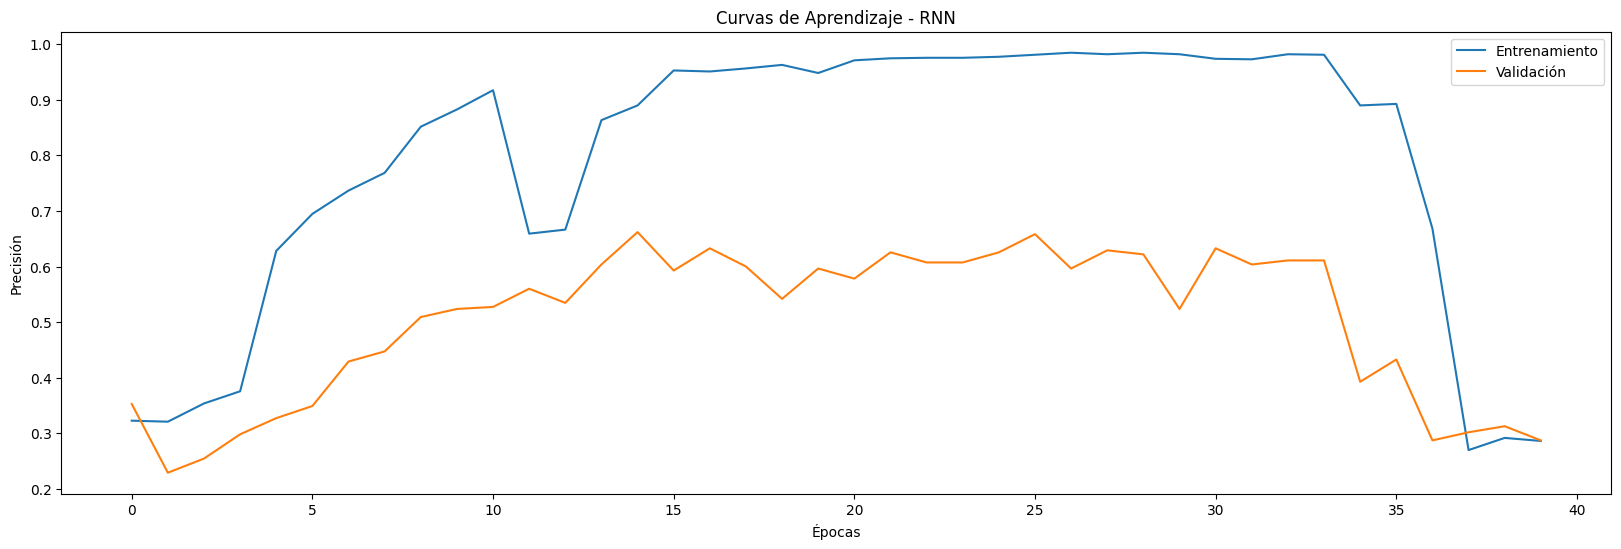

In [155]:
# Fijar la semilla para reproducibilidad
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Construcción del modelo RNN
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(word_index) + 1, output_dim=300, input_length=max_len))
model_rnn.add(SimpleRNN(units=64, return_sequences=False))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(units=len(etiquetas), activation='softmax'))

# Compilación del modelo
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=32)

# Visualización de resultados del modelo RNN
plt.figure(figsize=(20, 6))
plt.plot(history_rnn.history['accuracy'], label='Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN')
plt.show()

# Ejercicio 6

Implementación de un Modelo LSTM

**Objetivo:** Construir y entrenar un modelo LSTM para clasificar las noticias.

**Acciones:**
* Definir la arquitectura del modelo LSTM, que incluye celdas LSTM diseñadas para manejar dependencias a largo plazo más eficientemente.
* Configurar los hiperparámetros del modelo, similar al proceso del modelo RNN.
* Entrenar el modelo LSTM y evaluar su rendimiento utilizando los mismos conjuntos de datos.

Epoch 1/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - accuracy: 0.2567 - loss: 1.3914 - val_accuracy: 0.2582 - val_loss: 1.3804
Epoch 2/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.2294 - loss: 1.3869 - val_accuracy: 0.2545 - val_loss: 1.3784
Epoch 3/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.2359 - loss: 1.3848 - val_accuracy: 0.2545 - val_loss: 1.3778
Epoch 4/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.2285 - loss: 1.3843 - val_accuracy: 0.2545 - val_loss: 1.3767
Epoch 5/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.2358 - loss: 1.3839 - val_accuracy: 0.2764 - val_loss: 1.3743
Epoch 6/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.2325 - loss: 1.3831 - val_accuracy: 0.2727 - val_loss: 1.3710
Epoch 7/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.3067 - loss: 1.3281 - val_accuracy: 0.4000 - val_loss: 1.1966
Epoch 8/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.4190 - loss: 1.2060 - val_accuracy: 0.

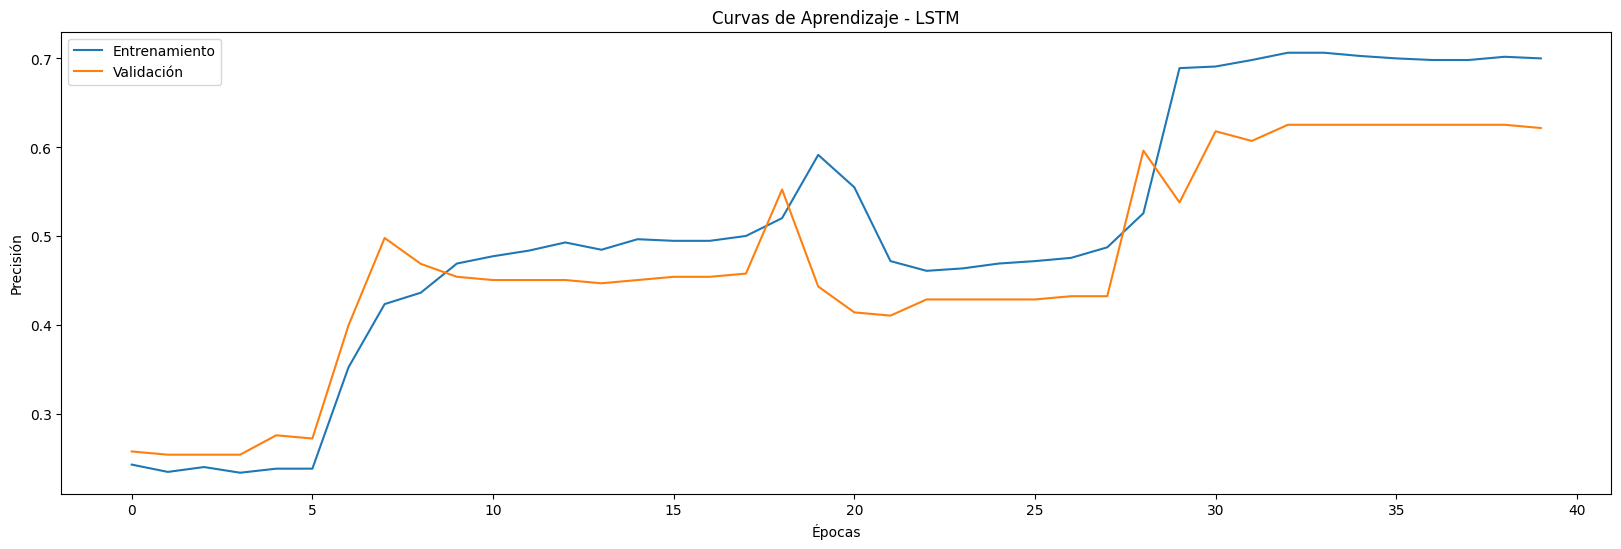

In [156]:
# Fijar la semilla para reproducibilidad
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Construcción del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(word_index) + 1, output_dim=300, input_length=max_len))
model_lstm.add(LSTM(units=64, return_sequences=False))
model_rnn.add(Dropout(0.5))
model_lstm.add(Dense(units=len(etiquetas), activation='softmax'))

# Compilación del modelo
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=32)

# Visualización de resultados del modelo LSTM
plt.figure(figsize=(20, 6))
plt.plot(history_lstm.history['accuracy'], label='Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - LSTM')
plt.show()

# Ejercicio 7

Comparación de Resultados

**Objetivo:** Evaluar y comparar el rendimiento de los modelos RNN y LSTM.

**Acciones:**
* Calcular y comparar métricas de rendimiento como precisión, recall y F1-score para ambos modelos.
* Visualizar las curvas de aprendizaje y los resultados de validación para entender mejor cómo se desempeñan los modelos en las tareas de clasificación.
* Comparar los modelos permite entender las fortalezas y debilidades de cada enfoque, proporcionando información valiosa para elegir el modelo más adecuado para tareas específicas de clasificación de texto. Documentar estos resultados de forma asertiva en el cuaderno y en el informe.

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
RNN Classification Report:
              precision    recall  f1-score   support

    deportes       0.00      0.00      0.00        69
     cultura       0.22      0.03      0.05        68
    economia       0.26      0.88      0.41        69
    justicia       0.48      0.23      0.31        69

    accuracy                           0.29       275
   macro avg       0.24      0.29      0.19       275
weighted avg       0.24      0.29      0.19       275

LSTM Classification Report:
              precision    recall  f1-score   support

    deportes       0.41      0.93      0.57        69
     cultura       0.90      0.68      0.77        68
    economia       0.90      0.88      0.89        69
    justicia       0.00      0.00      0.00        69

    accuracy                           0.62       275
   macro avg       0.55      0.62      0.56       275
weighted avg       0.55      0.62      0.56       275


c:\Users\Ermenegildo\Desktop\NPL\env_NPL_poetry\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ermenegildo\Desktop\NPL\env_NPL_poetry\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ermenegildo\Desktop\NPL\env_NPL_poetry\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

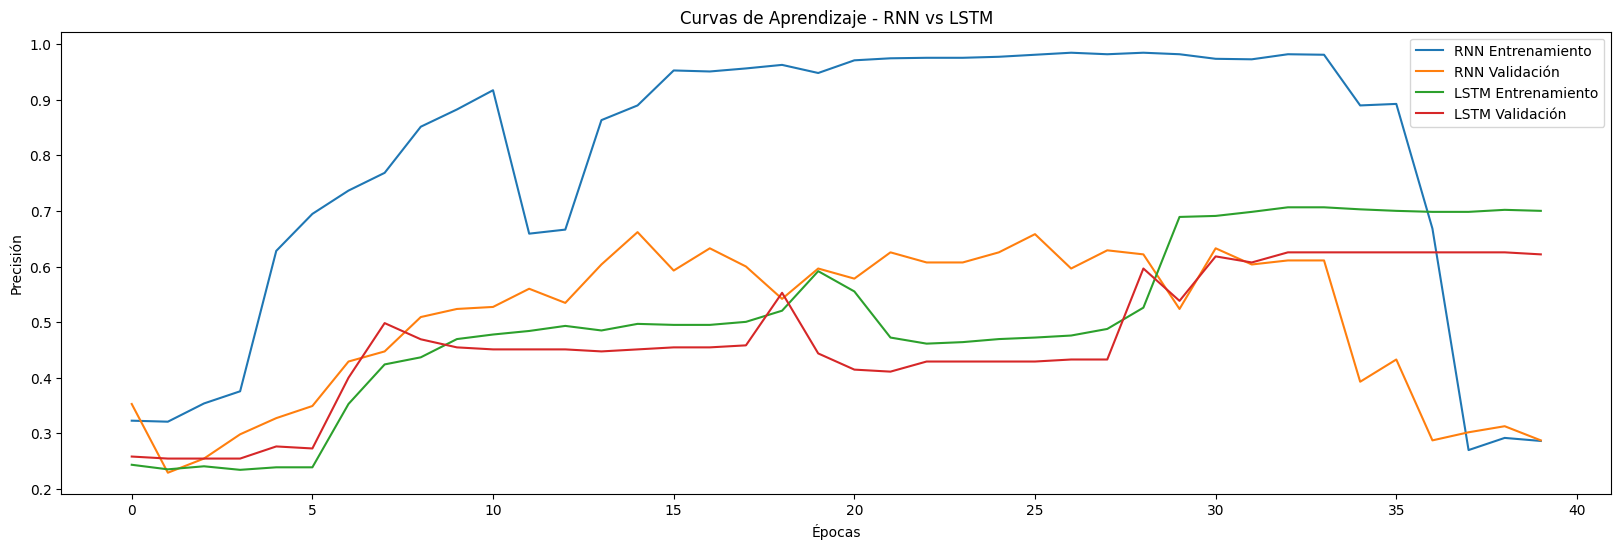

In [157]:

# Evaluar modelos en el conjunto de validación
y_pred_rnn = model_rnn.predict(X_val).argmax(axis=1)
y_pred_lstm = model_lstm.predict(X_val).argmax(axis=1)

# Calcular métricas de rendimiento
report_rnn = classification_report(y_val, y_pred_rnn, target_names=etiquetas)
report_lstm = classification_report(y_val, y_pred_lstm, target_names=etiquetas)

print("RNN Classification Report:")
print(report_rnn)

print("LSTM Classification Report:")
print(report_lstm)

# Visualización de resultados
plt.figure(figsize=(20, 6))
plt.plot(history_rnn.history['accuracy'], label='RNN Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validación')
plt.plot(history_lstm.history['accuracy'], label='LSTM Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN vs LSTM')
plt.show()


# Ejercicio 8

Evaluación y Conclusiones

**Objetivo:** Sintetizar los hallazgos y discutir las implicaciones prácticas.

**Acciones:**
* Documentar los resultados obtenidos en un informe detallado, incluyendo gráficos y análisis de las métricas de rendimiento.
* Discutir las implicaciones de los resultados para aplicaciones prácticas de NLP, como la automatización de la clasificación de noticias en sistemas de recomendación o análisis de medios.
* Proponer posibles mejoras y futuras direcciones de investigación, como la exploración de arquitecturas híbridas o la integración de mecanismos de atención.